In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab/anime/rating_complete.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [ ]:
user_values = data['user_id'].nunique()
anime_values = data['anime_id'].nunique()

In [ ]:
print(f'{user_values} {anime_values}')

310059 16872


In [ ]:
#리뷰 개수가 백개 이상인것만 가져옵니다
agg_ratings = data.groupby('anime_id').agg(mean_rating = ('rating', 'mean'),
                                        number_of_ratings=('rating','count')).reset_index()
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10489 entries, 0 to 16871
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anime_id           10489 non-null  int64  
 1   mean_rating        10489 non-null  float64
 2   number_of_ratings  10489 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 327.8 KB


In [ ]:
new_rating=agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False)[:100]

## 분포 살펴보기

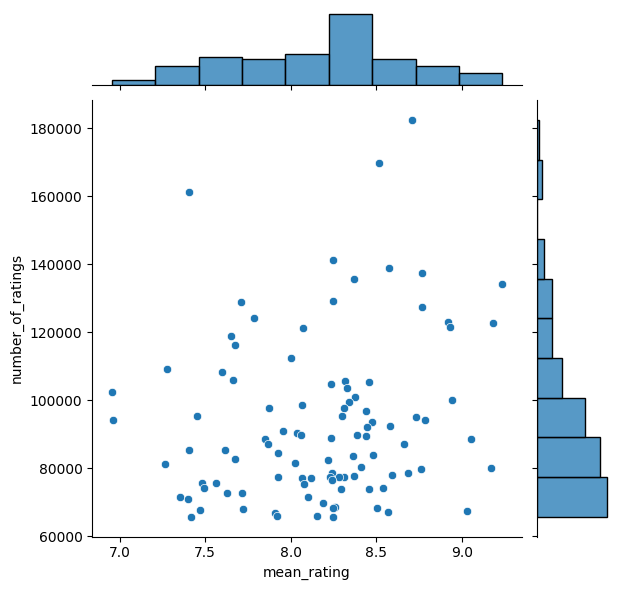

In [ ]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data = new_rating)

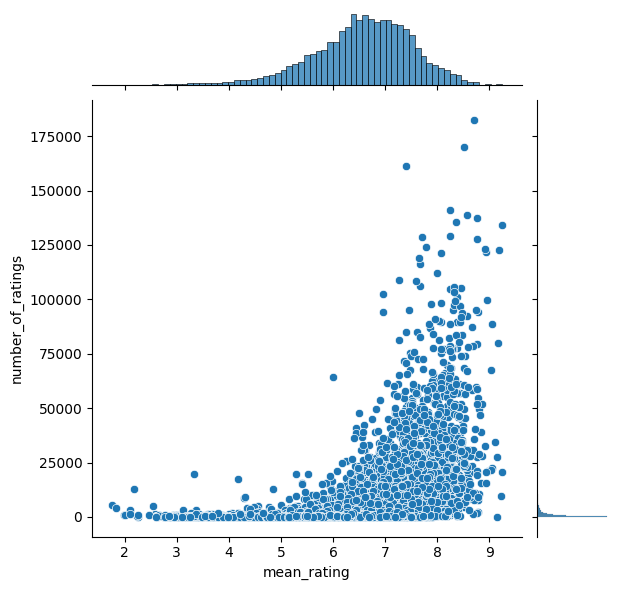

In [ ]:
#분포살펴보기
import seaborn as sns
sns.jointplot(x='mean_rating', y='number_of_ratings', data = agg_ratings_GT100)

## 데이터 필터링

In [ ]:
# 리뷰개수의 일정 구간만 리스트업
anime_list = list(new_rating['anime_id'])

In [ ]:
topUser = data['user_id'].value_counts()[2000:][:1000]
topUser

9165      1323
313373    1323
247823    1322
235635    1322
123497    1321
          ... 
163153    1147
245817    1147
145568    1147
346470    1147
53858     1147
Name: user_id, Length: 1000, dtype: int64

In [ ]:
# topUser = data['user_id'].value_counts()[:30000]
random_user_ids = data['user_id'].sample(n=1000)
random_anime_ids = data['anime_id'].sample(n=100)
# new_data = data[(data['user_id'].isin(random_user_ids)) & (data['anime_id'].isin(anime_list))]
new_data = data[(data['user_id'].isin(topUser))]
# new_data = data[data['anime_id'].isin(anime_list)]

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27742 entries, 184568 to 212310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   27742 non-null  int64
 1   anime_id  27742 non-null  int64
 2   rating    27742 non-null  int64
dtypes: int64(3)
memory usage: 866.9 KB


In [ ]:
#애니 이름 확인
anime_name = pd.read_csv('/content/drive/MyDrive/Colab/anime/anime.csv')
anime_detail = anime_name[['MAL_ID','Name','Japanese name']]
anime_detail.rename(columns={"MAL_ID": "anime_id"}, inplace=True)
# 데이터 병합
df_full = pd.merge(new_data, anime_detail, on='anime_id')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27742 entries, 0 to 27741
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        27742 non-null  int64 
 1   anime_id       27742 non-null  int64 
 2   rating         27742 non-null  int64 
 3   Name           27742 non-null  object
 4   Japanese name  27742 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


<ipython-input-262-5c141dc71850>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_detail.rename(columns={"MAL_ID": "anime_id"}, inplace=True)


In [ ]:
#일단 데이터 저장
df_full.to_csv('/content/drive/MyDrive/Colab/anime/df_full.csv')

In [ ]:
import pandas as pd
df_full = pd.read_csv('/content/drive/MyDrive/Colab/anime/df_full.csv')

## 행렬 생성 - 유저기반

In [ ]:
# 상관행렬 만들기
matrix=df_full.pivot_table(index='user_id',columns='Name',values='rating')
matrix.head()

Name,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Trilogy,.hack//Intermezzo,.hack//Quantum,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,001,...,number24,number24 Recap,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#데이터 정규화
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis= 'rows')
matrix_norm.head()

Name,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Trilogy,.hack//Intermezzo,.hack//Quantum,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,001,...,number24,number24 Recap,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,NaN,NaN,NaN,NaN,NaN,NaN,-0.84,NaN,NaN,NaN,...,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 행렬생성 - 아이템기반

In [ ]:
matrix_item=df_full.pivot_table(index='Name',columns='user_id',values='rating')
matrix_item_norm = matrix_item.subtract(matrix_item.mean(axis=1), axis= 'rows')
matrix_item_norm.head()


user_id,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,...,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323
Name,,,,,,,,,,,,,,,,,,,,,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Bungaku Shoujo"" Memoire",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Bungaku Shoujo"" Movie",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Trilogy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Intermezzo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 유사도측정
item_sim = matrix_item_norm.T.corr()
item_sim_filled = item_sim.fillna(0)
item_sim_filled.head()

Name,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Trilogy,.hack//Intermezzo,.hack//Quantum,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//The Movie: Sekai no Mukou ni,001,...,number24,number24 Recap,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
Name,,,,,,,,,,,,,,,,,,,,,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",1.000000,1.0,0.802955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Memoire",1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Movie",0.802955,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Intermezzo,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#기준 유저
picked_userid = 1147
#애니 선택
picked_anime = '"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi'
#유저가 본 애니메이션
picked_userid_watched = pd.DataFrame(matrix_item_norm[picked_userid].dropna(axis=0, how='all')\
                          .sort_values(ascending=False))\
                          .reset_index()\
                          .rename(columns={1147:'rating'})
picked_userid_watched

,Name,rating
0,The God of High School,2.866667
1,Uzaki-chan wa Asobitai!,2.857143
2,Plastic Memories,2.344828
3,Tokyo Ghoul √A,2.250000
4,"Kanojo, Okarishimasu",2.238095
...,...,...
83,Kimi no Na wa.,-0.983607
84,Clannad,-1.074074
85,Owarimonogatari 2nd Season,-1.363636
86,Tengen Toppa Gurren Lagann,-1.541667


In [ ]:
# 비슷한 애니메이션 점수를 가져옵니다
picked_anime_sim_score = item_sim_filled[[picked_anime]].reset_index().rename(columns={'"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi':'similarity_score'})
picked_anime_sim_score.head()

Name,Name,similarity_score
0,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",1.000000
1,"""Bungaku Shoujo"" Memoire",1.000000
2,"""Bungaku Shoujo"" Movie",0.802955
3,.hack//G.U. Trilogy,0.000000
4,.hack//Intermezzo,0.000000


In [ ]:
# 유저1147이 평가한 애니메이션과 비슷한 애니메이션을 랭킹
n = 5
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                            right=picked_anime_sim_score,
                                            on='Name',
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:5]
# 유저 1147이 본 것중에 기준 애니메이션과 유사도가 높은 애니들
picked_userid_watched_similarity

,Name,rating,similarity_score
71,Violet Evergarden,-0.333333,1.0
50,Otome Game no Hametsu Flag shika Nai Akuyaku R...,0.500000,1.0
7,Boku no Hero Academia,1.898305,1.0
53,Kokoro Connect,0.400000,1.0
42,Working!!,0.740741,1.0


In [ ]:
import numpy as np
#그런 다음, 유사도 점수와 평점의 가중 평균을 계산하여 유사도 점수가 높은 애에 더 많은 가중치를 부여
predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                    weights=picked_userid_watched_similarity['similarity_score']), 6)

print(f'The predicted rating for {picked_anime} by user {picked_userid} is {predicted_rating}' )

The predicted rating for "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi by user 1147 is 0.641142


## 애니메이션 추천

In [ ]:
#안본것 리스트
picked_userid_unwatched = pd.DataFrame(matrix_item_norm[picked_userid].isna()).reset_index()
picked_userid_unwatched = picked_userid_unwatched[picked_userid_unwatched[1147]==True]['Name'].values.tolist()


In [ ]:
len(picked_userid_unwatched)

4774

In [ ]:
import operator
number_of_similar_items = 10
number_of_recommendations = 5
# 평점 예측 딕셔너리
rating_prediction ={}
# 안본 리스트를 훑으면서 평점을 예측
for picked_anime in picked_userid_unwatched:
  # 기준 애니메이션과 안본 애니메이션들과의 유사도
  picked_anime_similarity_score = item_sim[[picked_anime]].reset_index().rename(columns={picked_anime:'similarity_score'})
  # 선택한 유저가 본 애니메이션과 안본 애니메이션의 유사도를 10개 랭킹
  picked_userid_watched_similarity = pd.merge(left=picked_userid_watched,
                                              right=picked_anime_similarity_score,
                                              on='Name',
                                              how='inner')\
                                      .sort_values('similarity_score', ascending=False)[:number_of_similar_items]
  # 유저 평점과 유사도의 가중치 평균을 이용해서 예상 평점을 계산한다.
  if picked_userid_watched_similarity['similarity_score'].sum() == 0:
        predicted_rating = 0  # 유사도 점수 합이 0일 경우, 예상 평점을 0으로 설정
  else:
      predicted_rating = round(np.average(picked_userid_watched_similarity['rating'],
                                          weights=picked_userid_watched_similarity['similarity_score']), 6)

  # 딕셔너리에 저장
  rating_prediction[picked_anime] = predicted_rating
sorted(rating_prediction.items(), key=lambda x: x[1], reverse=True)[:number_of_recommendations]


[('Kyousou Giga (TV)', 1.49321),
 ('3-gatsu no Lion', 1.321062),
 ('Kyousou Giga', 1.291597),
 ('Kyousou Giga (2012)', 1.208428),
 ('Bokura wa Minna Kawai-sou', 1.093738)]

## 비슷한 유저 추출

In [ ]:
# 행렬 전치
user_sim = matrix_norm.T.corr()
user_sim.head()

user_id,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,...,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323
user_id,,,,,,,,,,,,,,,,,,,,,
1147,1.000000,0.121896,0.275417,0.228364,0.500000,0.487950,NaN,0.422677,NaN,NaN,...,0.374018,NaN,2.791037e-18,0.0,0.681005,0.612832,-0.137937,0.000000e+00,NaN,0.337310
1148,0.121896,1.000000,0.418080,0.295929,0.349119,0.071110,NaN,0.205394,NaN,NaN,...,0.345723,NaN,7.398983e-01,NaN,-0.211495,0.643884,-0.301773,-3.141690e-01,NaN,0.297319
1149,0.275417,0.418080,1.000000,0.332652,0.000000,0.527346,NaN,-0.357599,NaN,3.204938e-17,...,0.232550,-0.57735,5.175349e-01,1.0,0.268860,0.290852,0.376550,-3.147186e-17,0.774597,0.381000
1150,0.228364,0.295929,0.332652,1.000000,0.801784,0.097767,NaN,-0.526285,-1.0,3.252218e-01,...,0.172027,NaN,2.771126e-01,NaN,0.340689,0.513847,0.329863,4.833775e-01,NaN,0.311991
1151,0.500000,0.349119,0.000000,0.801784,1.000000,0.738549,NaN,-0.204124,NaN,7.559289e-01,...,1.000000,NaN,-3.614487e-01,NaN,0.389742,0.188982,0.000000,1.000000e+00,NaN,0.138013


In [ ]:
# 기준 유저 추출
picked_userid = 1147
# 기준유저 제거
user_sim.drop(index=picked_userid,inplace=True)
user_sim.head()

user_id,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,...,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323
user_id,,,,,,,,,,,,,,,,,,,,,
1148,0.121896,1.000000,0.418080,0.295929,0.349119,0.071110,NaN,0.205394,NaN,NaN,...,0.345723,NaN,0.739898,NaN,-0.211495,0.643884,-0.301773,-3.141690e-01,NaN,0.297319
1149,0.275417,0.418080,1.000000,0.332652,0.000000,0.527346,NaN,-0.357599,NaN,3.204938e-17,...,0.232550,-0.57735,0.517535,1.0,0.268860,0.290852,0.376550,-3.147186e-17,0.774597,0.381000
1150,0.228364,0.295929,0.332652,1.000000,0.801784,0.097767,NaN,-0.526285,-1.0,3.252218e-01,...,0.172027,NaN,0.277113,NaN,0.340689,0.513847,0.329863,4.833775e-01,NaN,0.311991
1151,0.500000,0.349119,0.000000,0.801784,1.000000,0.738549,NaN,-0.204124,NaN,7.559289e-01,...,1.000000,NaN,-0.361449,NaN,0.389742,0.188982,0.000000,1.000000e+00,NaN,0.138013
1152,0.487950,0.071110,0.527346,0.097767,0.738549,1.000000,NaN,0.230518,NaN,-1.000000e+00,...,0.484375,NaN,0.424858,NaN,0.477495,0.569060,0.284145,-1.458650e-01,-0.333333,0.257708


In [ ]:
#유사 유저
n = 10
user_sim_threshold = 0.3
sim_users = user_sim[user_sim[picked_userid]>user_sim_threshold][picked_userid].sort_values(ascending=False)[:n]
sim_users

user_id
1215    1.000000
1161    1.000000
1311    1.000000
1176    0.829156
1281    0.720577
1207    0.702439
1318    0.681005
1304    0.675140
1251    0.662266
1319    0.612832
Name: 1147, dtype: float64

## 아이템 추천

In [ ]:
# 타깃 유저의 데이터
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Name,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Bakemonogatari,Boku no Hero Academia,Boku no Hero Academia 2nd Season,Boku no Hero Academia 3rd Season,Boku no Hero Academia 4th Season,Byousoku 5 Centimeter,Charlotte,...,Toradora!,Uzaki-chan wa Asobitai!,Violet Evergarden,Violet Evergarden Gaiden: Eien to Jidou Shuki Ningyou,"Violet Evergarden: Kitto ""Ai"" wo Shiru Hi ga Kuru no Darou",Working!!,Wotaku ni Koi wa Muzukashii,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan,Yesterday wo Utatte
user_id,,,,,,,,,,,,,,,,,,,,,
1147,0.272727,-0.727273,0.272727,-0.727273,1.272727,1.272727,1.272727,0.272727,-0.727273,-0.727273,...,0.272727,1.272727,-0.727273,-0.727273,-0.727273,0.272727,-0.727273,0.272727,-0.727273,-1.727273


In [ ]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(sim_users.index)].dropna(axis=1, how='all')
similar_user_movies

Name,3-gatsu no Lion,Aa! Megami-sama! (TV),Afro Samurai,Ai Yori Aoshi,Ai no Kusabi (2012),Ai to Yuuki no Pig Girl Tonde Buurin,Air,Aishiteruze Baby★★,AkaKill! Gekijou,Akame ga Kill!,...,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV),Yuri!!! on Ice,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! (Movie),Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.
user_id,,,,,,,,,,,,,,,,,,,,,
1161,NaN,NaN,NaN,-1.113924,NaN,-1.113924,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.886076,0.886076,NaN,NaN,NaN,NaN
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.070423,2.929577,...,0.929577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.968750,0.031250
1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.263158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,NaN,NaN,0.552632,NaN,0.552632,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.552632,0.552632,-2.447368,NaN,NaN,NaN,NaN,NaN
1318,NaN,-0.920561,NaN,NaN,NaN,NaN,-1.920561,0.079439,NaN,NaN,...,NaN,NaN,NaN,NaN,0.079439,0.079439,0.079439,0.079439,-0.920561,1.079439


In [ ]:
#비슷한 유저들이 시청한 애니메이션 중에서 타겟 유저가 시청한 목록을 제외합니다
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies

Name,3-gatsu no Lion,Aa! Megami-sama! (TV),Afro Samurai,Ai Yori Aoshi,Ai no Kusabi (2012),Ai to Yuuki no Pig Girl Tonde Buurin,Air,Aishiteruze Baby★★,AkaKill! Gekijou,Akatsuki no Yona,...,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV),Yuri!!! on Ice,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! (Movie),Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.
user_id,,,,,,,,,,,,,,,,,,,,,
1161,NaN,NaN,NaN,-1.113924,NaN,-1.113924,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.886076,0.886076,NaN,NaN,NaN,NaN
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.070423,NaN,...,0.929577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.968750,0.031250
1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,NaN,NaN,0.552632,NaN,0.552632,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.552632,0.552632,-2.447368,NaN,NaN,NaN,NaN,NaN
1318,NaN,-0.920561,NaN,NaN,NaN,NaN,-1.920561,0.079439,NaN,1.079439,...,NaN,NaN,NaN,NaN,0.079439,0.079439,0.079439,0.079439,-0.920561,1.079439


## 추천결과

In [ ]:
#아이템 점수 딕셔너리
item_score = {}

# 반복문
for i in similar_user_movies.columns:
  # 비슷한 유저 영화 목록에서 i 영화의 평가를 가져옵니다
  movie_rating = similar_user_movies[i]
  # 평가
  total = 0
  # 평가개수
  count = 0
  for u in sim_users.index:
    if pd.isna(movie_rating[u]) == False:
      # 점수는 영화와 유저 유사도의 곱
      score = sim_users[u] * movie_rating[u]
      # total에 점수를 더하고 count를 1 추가한다
      total += score
      count +=1
  # 점수 평균 구하기
  item_score[i] = total / count

# 데이터 프레임으로 바꾼다. 컬럼은 애니와 애니점수다
item_score = pd.DataFrame(item_score.items(), columns=['Name', 'score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,Name,score
472,X,2.886076
313,Nisekoi,2.429077
13,Ansatsu Kyoushitsu 2nd Season,2.429077
368,Saenai Heroine no Sodatekata,2.429077
264,Kyoushirou to Towa no Sora,2.031250
73,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen",2.031250
256,Kuroko no Basket 3rd Season,1.916978
61,Cardcaptor Sakura,1.886076
271,Magic Knight Rayearth,1.886076
272,Magic Knight Rayearth II,1.886076
